Importing required libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random as random
import math as math
from numpy import linalg as LA

Read CSV file

In [4]:
col = ['x1','x2']
df = pd.read_csv("dataset.csv",names=col, header=None)
df.drop([0],axis=0,inplace=True)
df['x1'] = df['x1'].astype(float)
df['x2'] = df['x2'].astype(float)

In [5]:
from sklearn.preprocessing import MinMaxScaler
def scaleitright(d):
    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(d)
    df=pd.DataFrame(scaled,columns=d.columns)
    return df

In [6]:
df=scaleitright(df)
datas = df.to_numpy()

Compute euclidean distance

In [7]:
def eucDist(data,mean):
    return LA.norm(data-mean)

Classification of data points

In [8]:
def classify(data , means):
    index = -1
    min = math.inf
    for i in range(0,len(means)) :
        dis = eucDist(data ,means[i])
        if(dis < min):
            index = i
            min = dis
    return index;

Initialising means randomly

In [9]:
def random_means(datas,k):
    means=[]
    index = [random.sample(range(0,len(datas)), k)]
    for i in index :
        means.append(datas[i])
   
    return means[0]

Recompute means

In [10]:
def recompute_means(A,points,k):
    means = []
    for i in range(0,k):
        count=0
        mean = np.zeros(len(points[0]))
        for j in range(0,len(points)):
            if(A[i][j]==1):
                mean+=points[j];
                count+=1 
        try:
          mean=mean*(1/count)
        except:
          mean=0
        means.append(mean)
       
    
    return means

Graph plot

In [11]:
def plot_graph(df,A,mean):
    n=len(df)
    k=len(A)
    colm=["b","r","m","k","c","g"]
    y=np.zeros(n)
    for i in range(n):
        cluster = -1
        for j in range (k):
            if(A[j][i]==1):
                cluster = j
                break
        y[i]=cluster
    
    plt.scatter(df['x1'],df['x2'],c=y,s=2)
    plt.scatter(mean[0],mean[1],c=colm[:k],s=20,marker="^")
    plt.show()

Main function of k-means clustering

In [12]:
def k_means(datas,k):
    means = random_means(datas,k)
    itn=0
    while True:
        temp=[]
        A= [[0]*len(datas) for i in range(k)]
        for i in range(len(datas)):
            
            index = classify(datas[i],means)
            
            A[index][i]=1
        
        temp = recompute_means(A,datas,k)
        
        if np.array_equal(means,temp):
            print("Visualisation of clusters\n")
            print("Total iterations ",itn)
            
            plot_graph(df,A,temp)
            
            break
        means = temp  
        itn+=1

Visualisation of clusters

Total iterations  8


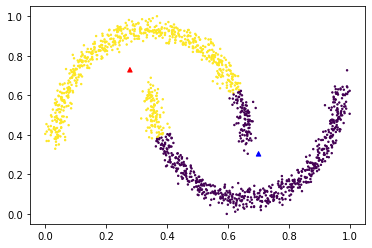

In [13]:
k_means(datas,2)

Creating weighted matrix

In [14]:
def adjacency(eps):
    W = np.zeros((datas.shape[0],datas.shape[0]))
    for i in range(datas.shape[0]):
        for j in range(datas.shape[0] ):
            if i!=j :
              temp = eucDist(datas[i],datas[j])
              if temp < eps:
                W[i][j] = 1
                W[j][i] = 1
    return W

Creating Laplacian matrix

In [15]:
def laplacian(W):
    D = np.zeros((datas.shape[0],datas.shape[0]))
    d = np.array(W.sum(axis=1)).ravel()
    D = np.diag(d)
    L = D-W
    return L

Creating new data points from eigen vectors of laplacian matrix

In [16]:
def eig(L , k):
    points = np.zeros((datas.shape[0],k))
    e_val ,e_vec = LA.eigh(L)
    for i in range(k):
        vec = e_vec[:,i]
        for j in range(datas.shape[0]):
            points[j][i] = vec[j]
    return points

Main function of spectral clustering

In [17]:
def spectral(eps , k):
    W = adjacency(eps)
    L = laplacian(W)           
    points = eig(L,k)
    
    k_means(points , 2)

Visualisation of clusters

Total iterations  2


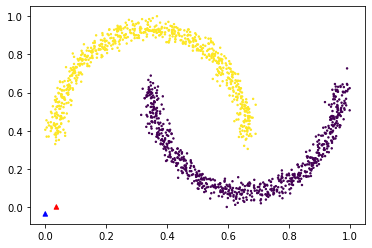

In [18]:
spectral(0.05 , 2)